# 05 Grupo de renormalización y cambio de base

Al trabajar con coeficientes de Wilson, es importante poder realizar el *running* de las ecuaciones del grupo de renormalización, como se explica en [arXiv:1901.06573](https://arxiv.org/abs/1901.06573). El paquete `wilson` incluye las ecuaciones del grupo de renormalización para el SMEFT y el WET.

In [1]:
from wilson import Wilson

En este ejemplo, vamos a calcular cómo cambia el valor del coeficiente $C_{\ell q(1)}^{2222}$ entre la escala $\mu = \Lambda$ y $\mu = M_Z$. Para ello usamos el método `.match_run()`, pero tenemos que tener cuidado porque no devuelve una instancia de `Wilson` sino de `WC`, por lo que tendremos que hacer la conversión.

In [13]:
LAMBDA = 1000
MZ = 91.1876

w1 = Wilson({'lq1_2222': 1/LAMBDA**2}, scale=LAMBDA, eft="SMEFT", basis="Warsaw")

w2 = Wilson.from_wc(w1.match_run(MZ, eft="SMEFT", basis="Warsaw"))

print(w2.wc.values['lq1_2222']['Re']*LAMBDA**2)

1.0007603792407804


Cambiar el valor de los coeficientes de Wilson que hemos definido no es el único efecto de las ecuaciones del grupo de renormalización. Debido al *mixing* entre operadores, nos encontramos que algunos coeficientes que eran nulos en la escala $\mu=\Lambda$ no lo serán en $\mu=M_Z$. Por ejemplo, el coeficiente $C_{\varphi q(1)}^{22}$ que modifica el *coupling* efectivo del bosón $Z$ con los quarks $c$ y $s$:

In [30]:
print(w2.wc.values['phiq1_22']*LAMBDA**2)

0.0012928982195234866


Cuando `flavio` calcula un observable en una teoría efectiva, lo primero que hace es calcular el *running* de los coeficientes de Wilson hasta la escala en la que esté definido dicho observable. Puedes ver a qué escala está definido cada clase de observables con el siguiente comando:

In [3]:
import flavio

flavio.config['renormalization scale']

{'bll': 4.8,
 'bllgamma': 4.8,
 'bpll': 4.8,
 'bvll': 4.8,
 'bxll': 5,
 'bvgamma': 4.8,
 'bxgamma': 2.0,
 'bxlnu': 4.6,
 'lambdab': 4.8,
 'kdecays': 2.0,
 'kpipi': 1.3,
 'dll': 2.0,
 'dpll': 2.0,
 'mudecays': 1.0,
 'taudecays': 1.8,
 'tau g-2': 91.1876,
 'e g-2': 1,
 'zdecays': 91.1876,
 'wdecays': 91.1876,
 'hdecays': 125,
 'ee_ww': 91.1876,
 'Bs mixing': 4.2,
 'B0 mixing': 4.2,
 'K0 mixing': 2.0,
 'D0 mixing': 2.0,
 'nEDM': 2.0,
 'betadecay': 1.0}

Podemos comprobar que `flavio` usa las ecuaciones del grupo de renormalización con la predicción del observable $\Gamma(Z\to c\bar{c})$:

In [34]:
flavio.sm_prediction('Gamma(Z->cc)')

0.2998326143741367

Si lo calculamos en la teoría efectiva definida por $C_{\ell q(1)}^{2222}$ en $\mu=\Lambda$, vemos que su valor cambia ligeramente:

In [33]:
flavio.np_prediction('Gamma(Z->cc)', w1)

0.29978001415103667

Sin embargo, si definimos $C_{\ell q(1)}^{2222}$ en $\mu=M_z$, no hay *mixing* al coeficiente $C_{\varphi q(1)}^{22}$, y por lo tanto $\Gamma(Z\to c\bar{c})$ vale lo mismo que en el SM:

In [22]:
w_Z = Wilson({'lq1_2222': w2.wc.values['lq1_2222']['Re']}, scale=MZ, eft="SMEFT", basis="Warsaw")

flavio.np_prediction('Gamma(Z->cc)', w_Z)

0.2998326143741367

## Teoría efectiva WET

Para escalas de energía inferiores a la escala electrodébil ($\sim M_Z$), no es suficiente con aplicar el *running* del grupo de renormalización. También hay que integrar las partículas pesadas: $t$, $h$, $Z$ y $W$. El resultado es una nueva teoría efectiva conocida como *WET* [*Weak effective theory*]. Usualmente se usa como base [un conjunto de operadores definidos ad-hoc](https://wcxf.github.io/assets/pdf/WET.flavio.pdf), y no sistemáticamente, que en `wilson` se llaman simplemente `basis="flavio"`. Para nosotros los más interesantes serán:
$$\mathcal{L}_\mathrm{WET} = \frac{4G_F}{\sqrt{2}}V_{tb}V_{ts}^*\frac{e^2}{16\pi^2}\left( C_9^\mu O_9^\mu + C_{10}^\mu O_{10}^\mu \right) - \frac{4G_F}{\sqrt{2}}V_{cb} C_{VL}^\tau O_{VL}^\tau\,,$$
donde los operadores relevantes para $b\to s\mu^+\mu^-$ son $$O_9^\mu = (\bar{s}_L \gamma^\mu b_L)(\bar{\mu}\gamma_\mu \mu)\,,\qquad O_{10}^\mu = (\bar{s}_L \gamma^\mu b_L)(\bar{\mu}\gamma_\mu\gamma_5 \mu)\,,$$
y para $b\to c\tau\nu$ $$O_{VL}^\tau = (\bar{c}\gamma^\mu b_L)(\bar{\tau}_L \gamma_\mu \nu_\tau)\,.$$

Al integrar las partículas pesadas del SM, estas también contribuyen a estos operadores efectivos: en el caso de $O_{VL}$ al integrar el bosón $W$ en el diagrama a nivel árbol $bc \to W \to \tau\nu$, y en $C_9$ y $C_{10}$ al integrar el top, $W$ y $Z$ que aparecen a un loop. Por ello es conveniente separar las contribuciones del SM y las de NP. Los valores que genera `wilson` corresponden únicamente a la contribución de NP.

El método `.match_run()` también realiza la integración de las partículas pesadas y el cambio de base:

In [4]:
MB = 4.8

w_b = Wilson.from_wc(w1.match_run(MB, eft="WET", basis="flavio"))
print(f"C9 = {w_b.wc.values['C9_bsmumu']['Re']}")
print(f"C10 = {w_b.wc.values['C10_bsmumu']['Re']}")
print(f"CVL = {w_b.wc.values['CVL_bctaunutau']['Re']}")

C9 = 0.3007502244911878
C10 = -0.3035337638079791
CVL = -1.5675856478160052e-06


La combinación $C_9 = - C_{10}$ aparece frecuentemente al hacer el *running* desde el SMEFT.

Habrás comprobado que el cálculo de los coeficientes de Wilson en la nueva escala de energía es relativamente lento. De hecho, es el paso más costoso a la hora de calcular un observable:

In [5]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
from utils import Temporizador


with Temporizador() as t:
    RD = flavio.np_prediction('Rtaul(B->Dlnu)', w1)

print(t.ver_tiempo())

0.5466209350015561


In [6]:
with Temporizador() as t:
    RD = flavio.np_prediction('Rtaul(B->Dlnu)', w_b)

print(t.ver_tiempo())

0.011753527000109898


Por lo tanto, cuando se calculen varios observables definidos en una única escala de renormalización, es conveniente calcular el *running* una sola vez.

## Aproximación del logaritmo principal

Las ecuaciones del grupo de renormalización son un sistema de ecuaciones diferenciales de primer orden no lineales. `wilson` las resuelve mediante integración numérica, utilizando el algoritmo de Runge-Kutta de quinto orden (el método por defecto de [`scipy.integrate.solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)).


Puedes ver las ecuaciones del grupo de renormalización del SMEFT en [1308.2627](https://arxiv.org/abs/1308.2627), [1310.4838](https://arxiv.org/abs/1310.4838) y [1312.2014](https://arxiv.org/abs/1312.2014). Esquemáticamente, se pueden escribir como $$\frac{d}{d\log\mu} C_i = \frac{\beta_{ij}(\mu)}{16\pi^2} C_j\,.$$

La función beta no depende explícitamente de $\mu$, solamente depende a través de los parámetros del SM ($\lambda$, acoplos de Yukaway acoplos *gauge*), que dependen de $\mu$ porque también tienen que ser renormalizados. En general esta dependencia no es muy fuerte (logarítmica), por lo que se pueden aproximar como constantes. Al hacer esta aproximación, las ecuaciones diferenciales ahora son lineales, y su solución es inmediata:$$C_i(\mu_2) = C_i(\mu_1) + \frac{\beta_{ij}}{16\pi^2} C_j(\mu_1) \log\frac{\mu_2}{\mu_1}\,.$$

En `wilson` es posible utilizar esta aproximación con el SMEFT (pero no con el WET):

In [14]:
w1.set_option("smeft_accuracy", "leadinglog")

w2_leadinglog = Wilson.from_wc(w1.match_run(MZ, eft="SMEFT", basis="Warsaw"))

El cálculo del *running* es más rápido, pero también más impreciso

In [15]:
print(w2_leadinglog.wc.values['lq1_2222']*LAMBDA**2)

1.0002009304579864


Veamos una comparación:

In [21]:
import numpy as np

w1.set_option("smeft_accuracy", "integrate")

lq1_int = []
phiq1_int = []
for mu in np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50):
    w_temp = Wilson.from_wc(w1.match_run(mu, eft="SMEFT", basis="Warsaw"))
    lq1 = w_temp.wc.values['lq1_2222']
    if isinstance(lq1, dict):
        lq1_int.append(lq1['Re']*LAMBDA**2)
    else:
        lq1_int.append(lq1*LAMBDA**2)
    phiq1 = w_temp.wc.values['phiq1_22']
    if isinstance(phiq1, dict):
        phiq1_int.append(phiq1['Re']*LAMBDA**2)
    else:
        phiq1_int.append(phiq1*LAMBDA**2)
    

In [22]:
w1.set_option("smeft_accuracy", "leadinglog")

lq1_ll = []
phiq1_ll = []
for mu in np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50):
    w_temp = Wilson.from_wc(w1.match_run(mu, eft="SMEFT", basis="Warsaw"))
    lq1 = w_temp.wc.values['lq1_2222']
    if isinstance(lq1, dict):
        lq1_ll.append(lq1['Re']*LAMBDA**2)
    else:
        lq1_ll.append(lq1*LAMBDA**2)
    phiq1 = w_temp.wc.values['phiq1_22']
    if isinstance(phiq1, dict):
        phiq1_ll.append(phiq1['Re']*LAMBDA**2)
    else:
        phiq1_ll.append(phiq1*LAMBDA**2)

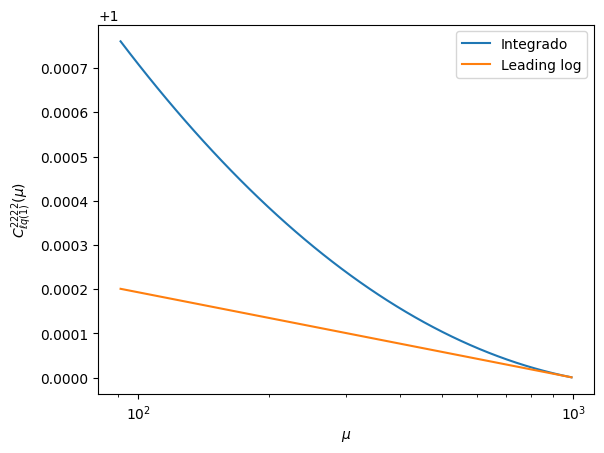

In [28]:
import matplotlib.pyplot as plt

plt.plot(np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50), lq1_int, label="Integrado")
plt.plot(np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50), lq1_ll, label="Leading log")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$C_{\ell q(1)}^{2222}(\mu)$")
plt.legend()
plt.xscale('log')

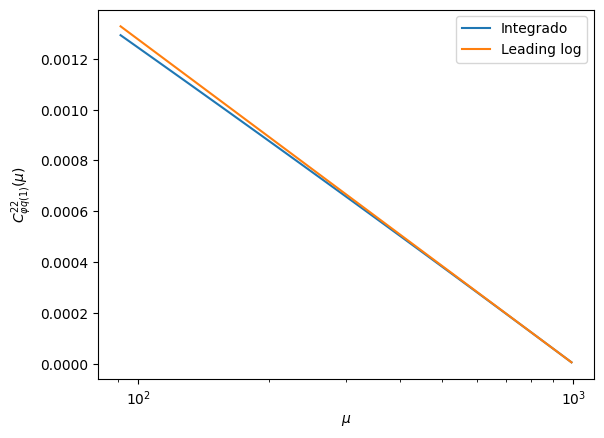

In [29]:
plt.plot(np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50), phiq1_int, label="Integrado")
plt.plot(np.logspace(np.log10(0.99*LAMBDA), np.log10(MZ), 50), phiq1_ll, label="Leading log")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$C_{\varphi q(1)}^{22}(\mu)$")
plt.legend()
plt.xscale('log')